Shibu Mohapatra

MSC CS Artificial Intelligence

**Binary classification using Python and interpret and predict the output for given data.**

In [23]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [24]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# delete the cabin column
df.drop(['Cabin'], axis=1, inplace=True)

# impute the 'Age' column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# ditch the two rows from 'Embarked'
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
# drop unncessary columns from train and testdf
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# recode the sex column
df['Sex'].replace(('male', 'female'), (0, 1), inplace=True)

# recode the embarked column
df['Embarked'].replace(('Q', 'S', 'C'), (0, 1, 2), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [27]:
# check distribution of target variable
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [28]:
(549/(549+340))

0.6175478065241845

In [29]:
Y = df['Survived']
X = df.drop(['Survived'], axis=1)

print(X.shape)
print(Y.shape)
X = np.array(X)

(889, 7)
(889,)


In [30]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                128       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
72/72 [==============================] - 1s 4ms/step - loss: 1.7698 - accuracy: 0.5134 - val_loss: 0.5600 - val_accuracy: 0.7022
Epoch 2/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6709 - val_loss: 0.5740 - val_accuracy: 0.6966
Epoch 3/80
72/72 [======================

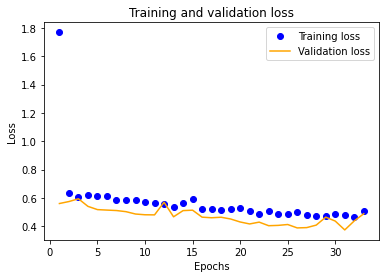

In [31]:
history_dict = history.history
# Learning curve(Loss)
# tthe training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

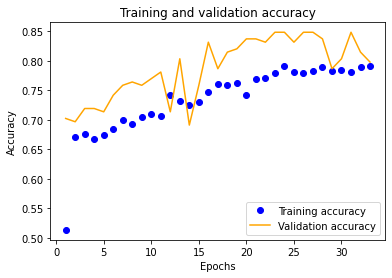

0.8483145833015442

In [32]:
# Learning curve(accuracy)
# the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

print(classification_report(Y, preds))

[[453  96]
 [ 77 263]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       549
           1       0.73      0.77      0.75       340

    accuracy                           0.81       889
   macro avg       0.79      0.80      0.80       889
weighted avg       0.81      0.81      0.81       889

